# White Rhino Trip Exploratory Data Analysis

## Load trip data json

In [1]:
import json
import pandas as pd

In [2]:
with open('./data/KTA354XA_trip_01.json') as f:
    d = json.load(f)

df = pd.json_normalize(d)
df

,id,deviceId,type,protocol,serverTime,deviceTime,fixTime,outdated,valid,latitude,...,attributes.hdop,attributes.power,attributes.battery,attributes.io68,attributes.adc1,attributes.operator,attributes.odometer,attributes.distance,attributes.totalDistance,attributes.hours
0,5731642,35,None,teltonika,2021-08-16T05:32:07.149+00:00,2021-08-16T05:32:04.000+00:00,2021-08-16T05:32:04.000+00:00,False,True,5.070095,...,0.3,25.353,4.038,0,2549,62130,4168377,0.0,4164234.18,686730980
1,5731656,35,None,teltonika,2021-08-16T05:32:13.924+00:00,2021-08-16T05:32:11.000+00:00,2021-08-16T05:32:11.000+00:00,False,True,5.070095,...,0.3,25.292,4.040,0,2549,62130,4168377,0.0,4164234.18,686730980
2,5731699,35,None,teltonika,2021-08-16T05:32:37.871+00:00,2021-08-16T05:32:35.000+00:00,2021-08-16T05:32:35.000+00:00,False,True,5.070095,...,0.3,28.044,4.038,0,2549,62130,4168377,0.0,4164234.18,686754980
3,5731806,35,None,teltonika,2021-08-16T05:33:37.869+00:00,2021-08-16T05:33:35.000+00:00,2021-08-16T05:33:35.000+00:00,False,True,5.070095,...,0.3,28.383,4.038,0,2549,62130,4168377,0.0,4164234.18,686814980
4,5731900,35,None,teltonika,2021-08-16T05:34:38.727+00:00,2021-08-16T05:34:36.000+00:00,2021-08-16T05:34:36.000+00:00,False,True,5.070095,...,0.3,28.391,4.038,0,2549,62130,4168377,0.0,4164234.18,686875980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,5750440,35,None,teltonika,2021-08-16T07:40:14.839+00:00,2021-08-16T07:40:12.000+00:00,2021-08-16T07:40:12.000+00:00,False,True,5.009142,...,0.3,26.848,4.038,0,2637,62130,4214166,0.0,4209930.89,693846980
1150,5750452,35,None,teltonika,2021-08-16T07:40:24.818+00:00,2021-08-16T07:40:22.000+00:00,2021-08-16T07:40:22.000+00:00,False,True,5.009142,...,0.3,26.806,4.038,0,2637,62130,4214166,0.0,4209930.89,693846980
1151,5750474,35,None,teltonika,2021-08-16T07:40:34.818+00:00,2021-08-16T07:40:32.000+00:00,2021-08-16T07:40:32.000+00:00,False,True,5.009142,...,0.3,26.762,4.038,0,2637,62130,4214166,0.0,4209930.89,693846980
1152,5750495,35,None,teltonika,2021-08-16T07:40:44.843+00:00,2021-08-16T07:40:42.000+00:00,2021-08-16T07:40:42.000+00:00,False,True,5.009142,...,0.3,26.729,4.038,0,2637,62130,4214166,0.0,4209930.89,693846980


In [3]:
# convert device time to numeric
# pd.to_timedelta(df.deviceTime).dt.total_seconds().astype(int)
#pd.to_numeric(df.deviceTime)
#df['deviceTime_num'] = pd.to_numeric(df.deviceTime)

In [4]:
df = df.rename(columns={"attributes.adc1":"adc", 'attributes.battery':'battery', 'attributes.power':'power','attributes.totalDistance':'totalDistance'}, errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1154 non-null   int64  
 1   deviceId              1154 non-null   int64  
 2   type                  0 non-null      object 
 3   protocol              1154 non-null   object 
 4   serverTime            1154 non-null   object 
 5   deviceTime            1154 non-null   object 
 6   fixTime               1154 non-null   object 
 7   outdated              1154 non-null   bool   
 8   valid                 1154 non-null   bool   
 9   latitude              1154 non-null   float64
 10  longitude             1154 non-null   float64
 11  altitude              1154 non-null   float64
 12  speed                 1154 non-null   float64
 13  course                1154 non-null   float64
 14  address               0 non-null      object 
 15  accuracy             

In [5]:
df.columns

Index(['id', 'deviceId', 'type', 'protocol', 'serverTime', 'deviceTime',
       'fixTime', 'outdated', 'valid', 'latitude', 'longitude', 'altitude',
       'speed', 'course', 'address', 'accuracy', 'network',
       'attributes.priority', 'attributes.sat', 'attributes.event',
       'attributes.ignition', 'attributes.motion', 'attributes.rssi',
       'attributes.io200', 'attributes.gpsStatus', 'attributes.pdop',
       'attributes.hdop', 'power', 'battery', 'attributes.io68', 'adc',
       'attributes.operator', 'attributes.odometer', 'attributes.distance',
       'totalDistance', 'attributes.hours'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1154, step=1)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.values

array([[5731642, 35, None, ..., 0.0, 4164234.18, 686730980],
       [5731656, 35, None, ..., 0.0, 4164234.18, 686730980],
       [5731699, 35, None, ..., 0.0, 4164234.18, 686754980],
       ...,
       [5750474, 35, None, ..., 0.0, 4209930.89, 693846980],
       [5750495, 35, None, ..., 0.0, 4209930.89, 693846980],
       [5750515, 35, None, ..., 0.0, 4209930.89, 693846980]], dtype=object)

In [9]:
df.dtypes

id                        int64
deviceId                  int64
type                     object
protocol                 object
serverTime               object
deviceTime               object
fixTime                  object
outdated                   bool
valid                      bool
latitude                float64
longitude               float64
altitude                float64
speed                   float64
course                  float64
address                  object
accuracy                float64
network                  object
attributes.priority       int64
attributes.sat            int64
attributes.event          int64
attributes.ignition        bool
attributes.motion          bool
attributes.rssi           int64
attributes.io200          int64
attributes.gpsStatus      int64
attributes.pdop         float64
attributes.hdop         float64
power                   float64
battery                 float64
attributes.io68           int64
adc                       int64
attribut

In [10]:
df['adc']

0       2549
1       2549
2       2549
3       2549
4       2549
        ... 
1149    2637
1150    2637
1151    2637
1152    2637
1153    2637
Name: adc, Length: 1154, dtype: int64

In [11]:
df.deviceTime

0       2021-08-16T05:32:04.000+00:00
1       2021-08-16T05:32:11.000+00:00
2       2021-08-16T05:32:35.000+00:00
3       2021-08-16T05:33:35.000+00:00
4       2021-08-16T05:34:36.000+00:00
                    ...              
1149    2021-08-16T07:40:12.000+00:00
1150    2021-08-16T07:40:22.000+00:00
1151    2021-08-16T07:40:32.000+00:00
1152    2021-08-16T07:40:42.000+00:00
1153    2021-08-16T07:40:52.000+00:00
Name: deviceTime, Length: 1154, dtype: object

In [12]:
df[['deviceTime','adc', 'speed', 'totalDistance']]

,deviceTime,adc,speed,totalDistance
0,2021-08-16T05:32:04.000+00:00,2549,0.0,4164234.18
1,2021-08-16T05:32:11.000+00:00,2549,0.0,4164234.18
2,2021-08-16T05:32:35.000+00:00,2549,0.0,4164234.18
3,2021-08-16T05:33:35.000+00:00,2549,0.0,4164234.18
4,2021-08-16T05:34:36.000+00:00,2549,0.0,4164234.18
...,...,...,...,...
1149,2021-08-16T07:40:12.000+00:00,2637,0.0,4209930.89
1150,2021-08-16T07:40:22.000+00:00,2637,0.0,4209930.89
1151,2021-08-16T07:40:32.000+00:00,2637,0.0,4209930.89
1152,2021-08-16T07:40:42.000+00:00,2637,0.0,4209930.89


In [13]:
df[['deviceTime','adc']] # error when accessing by index'

,deviceTime,adc
0,2021-08-16T05:32:04.000+00:00,2549
1,2021-08-16T05:32:11.000+00:00,2549
2,2021-08-16T05:32:35.000+00:00,2549
3,2021-08-16T05:33:35.000+00:00,2549
4,2021-08-16T05:34:36.000+00:00,2549
...,...,...
1149,2021-08-16T07:40:12.000+00:00,2637
1150,2021-08-16T07:40:22.000+00:00,2637
1151,2021-08-16T07:40:32.000+00:00,2637
1152,2021-08-16T07:40:42.000+00:00,2637


In [14]:
sel_col = list(range(0,5))
df.iloc[:,sel_col]

,id,deviceId,type,protocol,serverTime
0,5731642,35,None,teltonika,2021-08-16T05:32:07.149+00:00
1,5731656,35,None,teltonika,2021-08-16T05:32:13.924+00:00
2,5731699,35,None,teltonika,2021-08-16T05:32:37.871+00:00
3,5731806,35,None,teltonika,2021-08-16T05:33:37.869+00:00
4,5731900,35,None,teltonika,2021-08-16T05:34:38.727+00:00
...,...,...,...,...,...
1149,5750440,35,None,teltonika,2021-08-16T07:40:14.839+00:00
1150,5750452,35,None,teltonika,2021-08-16T07:40:24.818+00:00
1151,5750474,35,None,teltonika,2021-08-16T07:40:34.818+00:00
1152,5750495,35,None,teltonika,2021-08-16T07:40:44.843+00:00


In [15]:

df.loc[[0,10],['deviceTime','adc']]

,deviceTime,adc
0,2021-08-16T05:32:04.000+00:00,2549
10,2021-08-16T05:36:34.000+00:00,2859


In [16]:
server_time = pd.to_datetime(df['serverTime'])
server_time

0      2021-08-16 05:32:07.149000+00:00
1      2021-08-16 05:32:13.924000+00:00
2      2021-08-16 05:32:37.871000+00:00
3      2021-08-16 05:33:37.869000+00:00
4      2021-08-16 05:34:38.727000+00:00
                     ...               
1149   2021-08-16 07:40:14.839000+00:00
1150   2021-08-16 07:40:24.818000+00:00
1151   2021-08-16 07:40:34.818000+00:00
1152   2021-08-16 07:40:44.843000+00:00
1153   2021-08-16 07:40:56.980000+00:00
Name: serverTime, Length: 1154, dtype: datetime64[ns, UTC]

In [17]:
df.shape

(1154, 36)

In [18]:
df['serverTime'] = server_time

In [19]:
df.shape

(1154, 36)

In [20]:
df.columns

Index(['id', 'deviceId', 'type', 'protocol', 'serverTime', 'deviceTime',
       'fixTime', 'outdated', 'valid', 'latitude', 'longitude', 'altitude',
       'speed', 'course', 'address', 'accuracy', 'network',
       'attributes.priority', 'attributes.sat', 'attributes.event',
       'attributes.ignition', 'attributes.motion', 'attributes.rssi',
       'attributes.io200', 'attributes.gpsStatus', 'attributes.pdop',
       'attributes.hdop', 'power', 'battery', 'attributes.io68', 'adc',
       'attributes.operator', 'attributes.odometer', 'attributes.distance',
       'totalDistance', 'attributes.hours'],
      dtype='object')

In [21]:
df['deviceTime'] = pd.to_datetime(df['deviceTime'])
df.deviceTime

0      2021-08-16 05:32:04+00:00
1      2021-08-16 05:32:11+00:00
2      2021-08-16 05:32:35+00:00
3      2021-08-16 05:33:35+00:00
4      2021-08-16 05:34:36+00:00
                  ...           
1149   2021-08-16 07:40:12+00:00
1150   2021-08-16 07:40:22+00:00
1151   2021-08-16 07:40:32+00:00
1152   2021-08-16 07:40:42+00:00
1153   2021-08-16 07:40:52+00:00
Name: deviceTime, Length: 1154, dtype: datetime64[ns, UTC]

In [22]:
import seaborn as sns

In [23]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [24]:
dataset_1 = anscombe[anscombe.dataset == 'I']
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


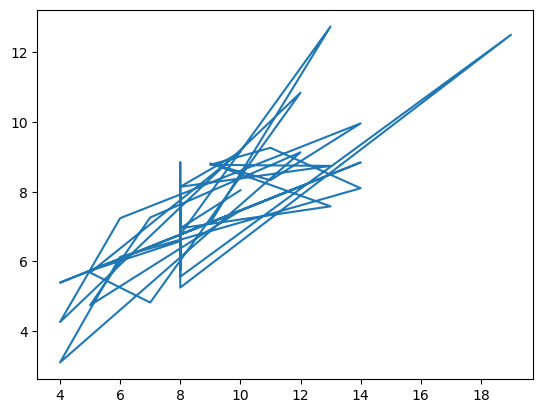

In [25]:
import matplotlib.pyplot as plt
plt.plot(anscombe.x, anscombe.y) # plots lines by default

#### Plot scatter plot

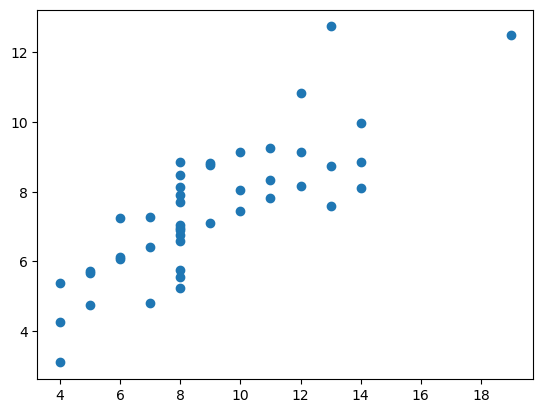

In [26]:
plt.plot(anscombe.x, anscombe.y, 'o') # scatter plot

In [27]:
dataset_2 = anscombe[anscombe.dataset == 'II']
dataset_3 = anscombe[anscombe.dataset == 'III']
dataset_4 = anscombe[anscombe.dataset == 'IV']

In [28]:
dataset_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [29]:
dataset_2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [30]:
dataset_3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [31]:
dataset_4.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


#### Plot Figure with 2x2 matrix for each dataset

Text(0.5, 0.98, 'Anscombe Data')

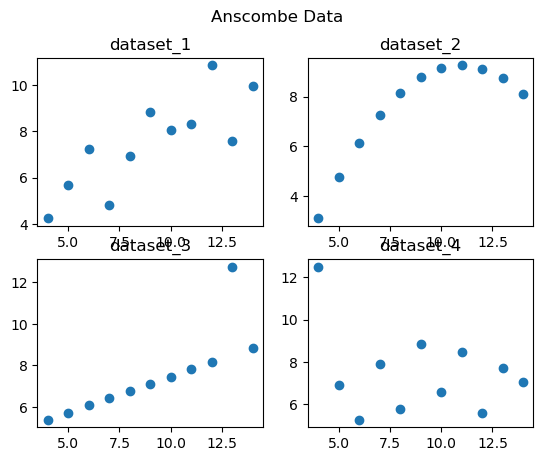

In [32]:
fig = plt.figure()

axes1 = fig.add_subplot(2,2,1) # top left
axes2 = fig.add_subplot(2,2,2) # top right 
axes3 = fig.add_subplot(2,2,3) # bottom left
axes4 = fig.add_subplot(2,2,4) # bottom right

axes1.plot(dataset_1.x, dataset_1.y, 'o')
axes2.plot(dataset_1.x, dataset_2.y, 'o')
axes3.plot(dataset_1.x, dataset_3.y, 'o')
axes4.plot(dataset_1.x, dataset_4.y, 'o')

axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')

#### Visualize Tips Data

In [33]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
tdf = df[['deviceTime','latitude', 'longitude', 'altitude', 'speed', 'adc', 'battery', 'power', 'totalDistance']].copy()


### Explore Trip ADC

In [35]:
tdf.adc.describe()

count    1154.000000
mean     2777.946274
std        63.246902
min      2512.000000
25%      2756.000000
50%      2771.000000
75%      2805.000000
max      3624.000000
Name: adc, dtype: float64

#### ADC Histogram

Text(0, 0.5, 'ADC')

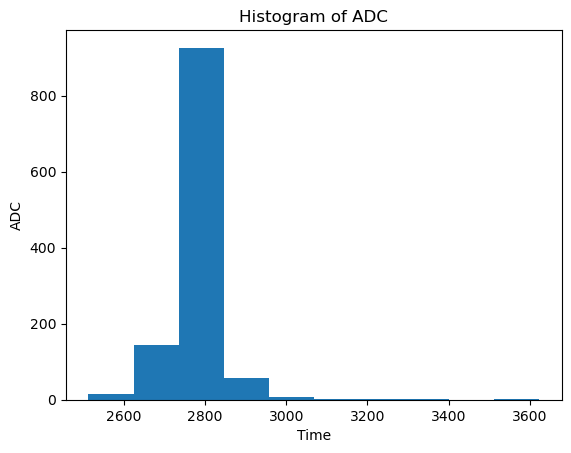

In [36]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tdf['adc'], bins = 10)
axes1.set_title('Histogram of ADC')
axes1.set_xlabel('Time')
axes1.set_ylabel('ADC')

#### ADC Scatter Plot

Text(0, 0.5, 'ADC')

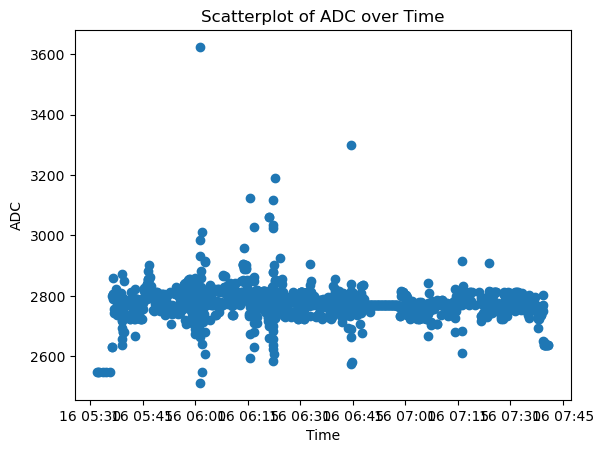

In [37]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['adc'])
axes1.set_title('Scatterplot of ADC over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('ADC')

#### ADC Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7240372fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f72403734f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7240372d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7240373a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7240373cd0>],
 'means': []}

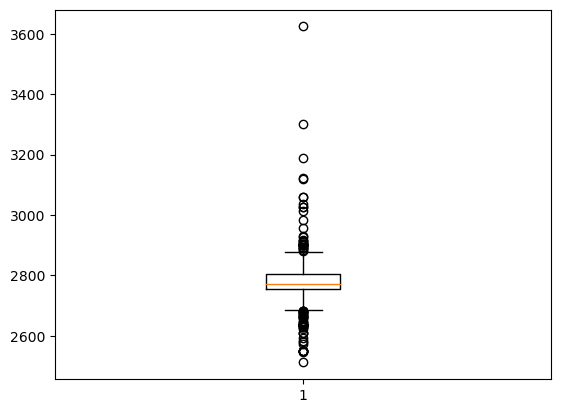

In [38]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(tdf['adc'])

#### Latitude vs Longitude Scatter Plot

Text(0, 0.5, 'Latitude')

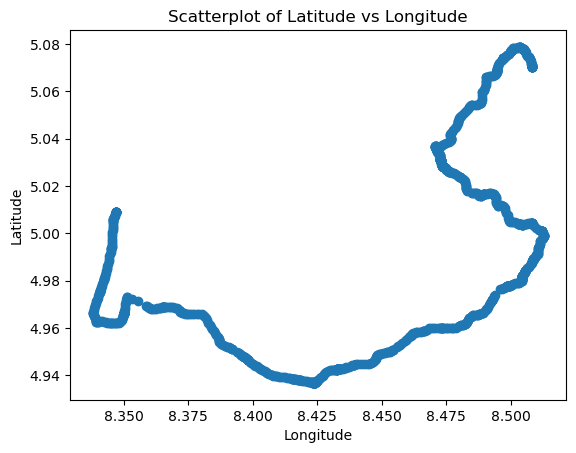

In [39]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['longitude'],tdf['latitude'])
axes1.set_title('Scatterplot of Latitude vs Longitude')
axes1.set_xlabel('Longitude')
axes1.set_ylabel('Latitude')

#### Latitude over time 

Text(0, 0.5, 'Latitude')

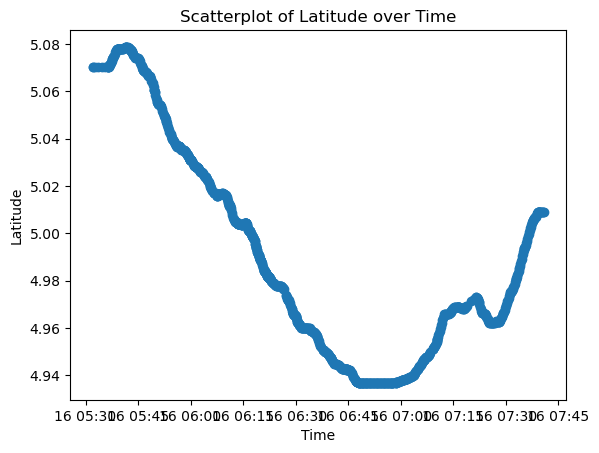

In [40]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['latitude'])
axes1.set_title('Scatterplot of Latitude over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('Latitude')

#### Longitude over time 

Text(0, 0.5, 'Longitude')

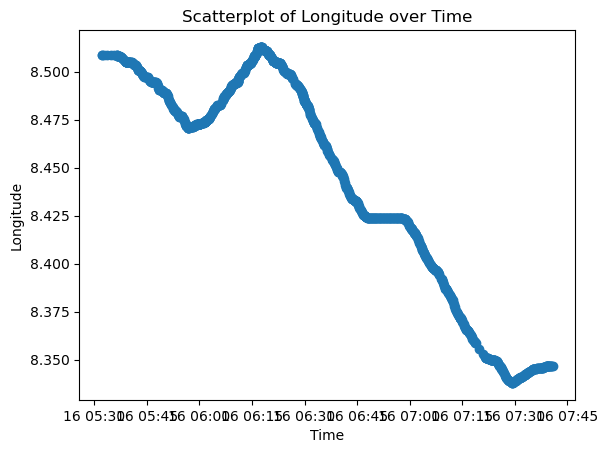

In [41]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['longitude'])
axes1.set_title('Scatterplot of Longitude over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('Longitude')

#### Speed over time 

Text(0, 0.5, 'Speed')

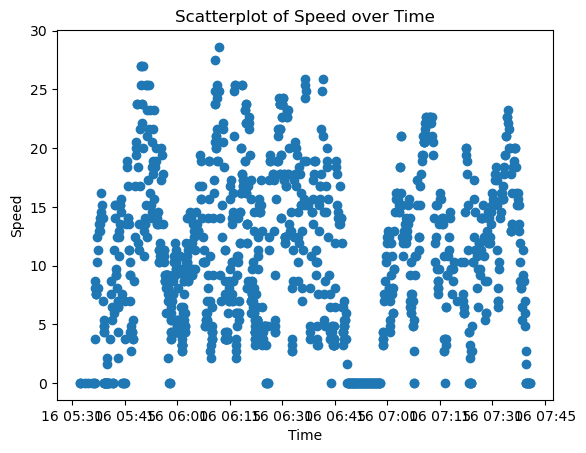

In [42]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['speed'])
axes1.set_title('Scatterplot of Speed over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('Speed')

#### Altitude over time 

Text(0, 0.5, 'altitude')

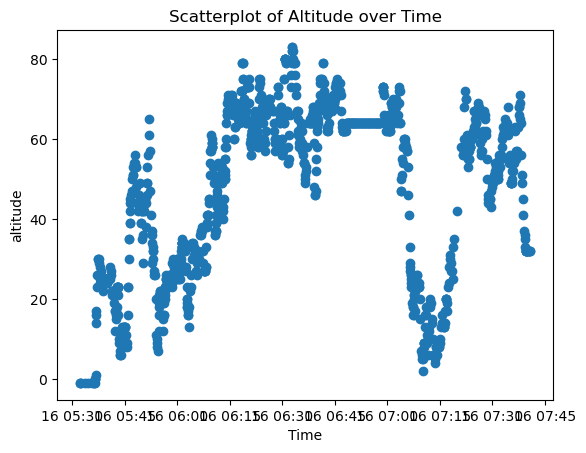

In [43]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['altitude'])
axes1.set_title('Scatterplot of Altitude over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('altitude')

#### Power over time 

Text(0, 0.5, 'power')

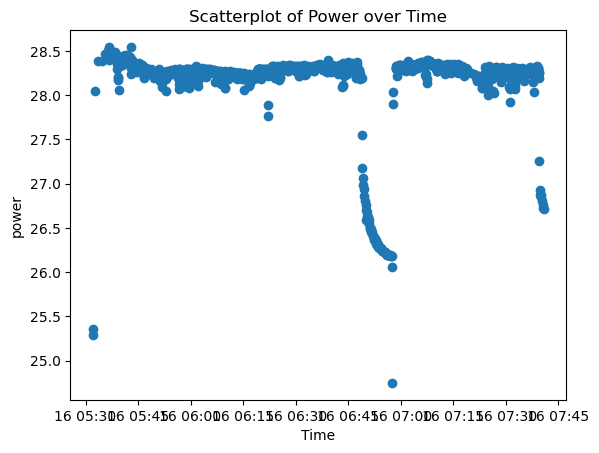

In [44]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['power'])
axes1.set_title('Scatterplot of Power over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('power')

#### Battery over time 

Text(0, 0.5, 'battery')

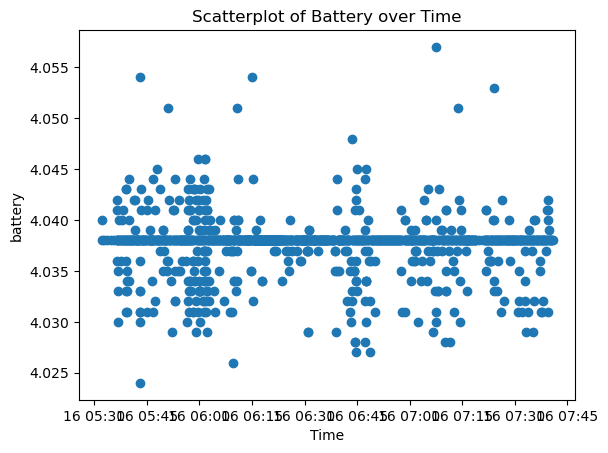

In [45]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tdf['deviceTime'],tdf['battery'])
axes1.set_title('Scatterplot of Battery over Time')
axes1.set_xlabel('Time')
axes1.set_ylabel('battery')

#### ADC Distribution Plot 

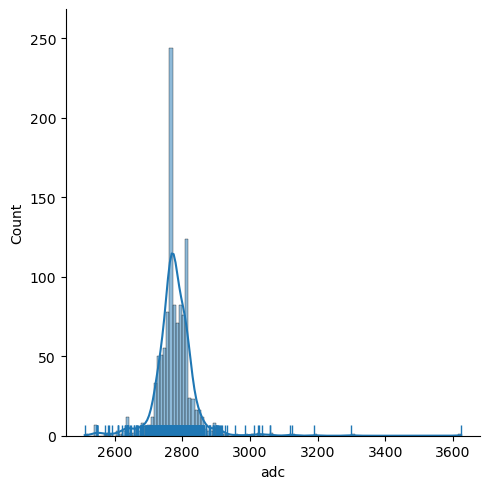

In [46]:
dist = sns.displot(tdf['adc'], rug=True, kde=True)
dist.set_titles(['ADC Histogoram with Density and Rug Plot'])

#### ADC Plots using Pandas

<AxesSubplot: ylabel='Frequency'>

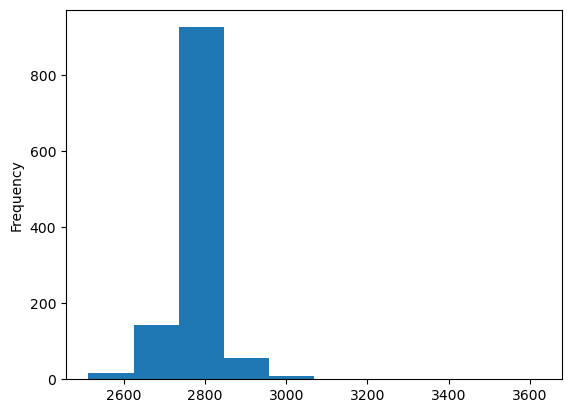

In [47]:
tdf['adc'].plot.hist()

<AxesSubplot: ylabel='Density'>

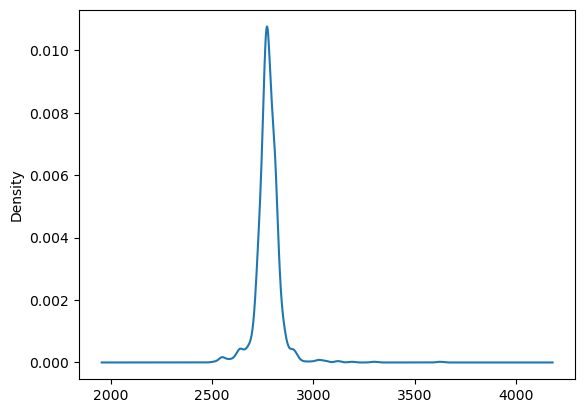

In [48]:
tdf['adc'].plot.kde()

<AxesSubplot: xlabel='deviceTime', ylabel='adc'>

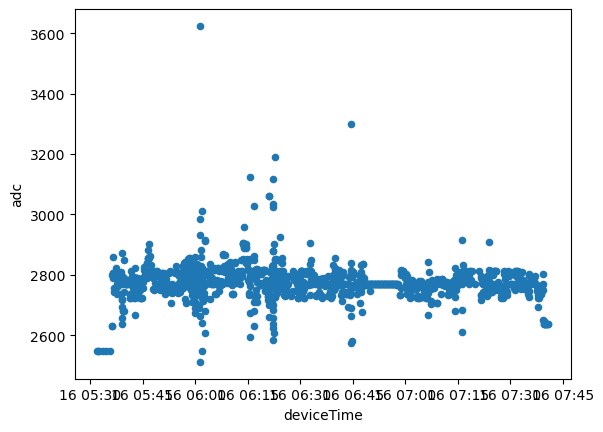

In [49]:
tdf.plot.scatter(x='deviceTime',y='adc')

<AxesSubplot: >

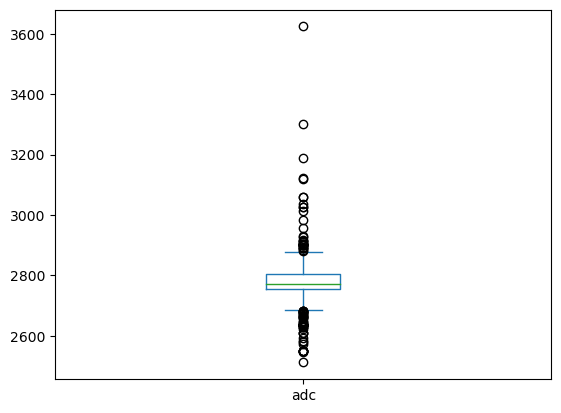

In [52]:
tdf.adc.plot.box()